# CAR PRICE ASSIGNMENT - LINEAR REGRESSION

## Step 1:Reading and Understanding the Data

In [1005]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1006]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1007]:
# Reading the csv file into a dataframe
car_pricing=pd.read_csv("CarPrice_Assignment.csv")
car_pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1008]:
#Checking the number of rows and columns in the dataframe
car_pricing.shape

(205, 26)

In [1009]:
#Obtaining basic information about the dataframe
car_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

We can see that there are no null values in the dataframe. However, we will cross-check once again.

In [1010]:
#Cross-check to see if there are any null values
car_pricing.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [1011]:
#Checking for any duplicate rows by looking for duplicates in the car_ID column.
print(any(car_pricing['car_ID'].duplicated()))   

False


We can see that there are no duplicate rows in the Dataframe.

In [1012]:
#Looking at the statistical summary of the dataset
car_pricing.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

#### Performing univariate on the "price" column

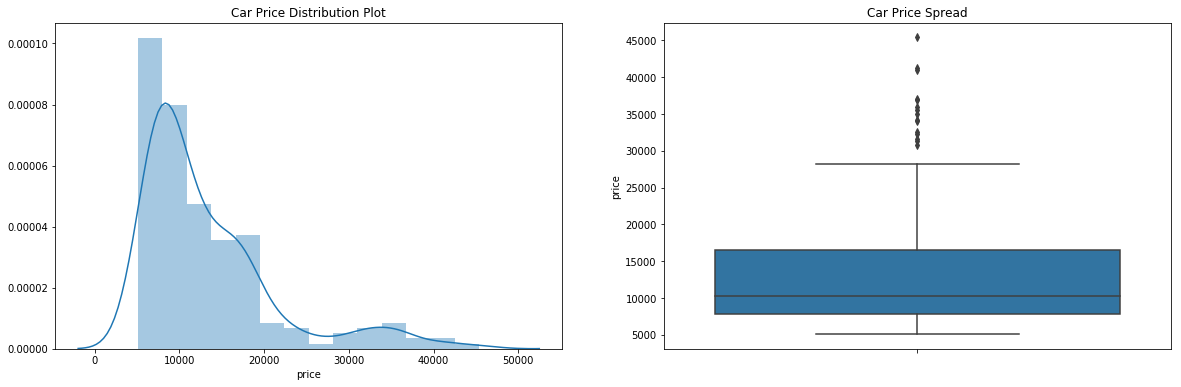

In [1013]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car_pricing["price"])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=car_pricing["price"])

plt.show()

INFERENCES:

1. We can see from the box plot that the distribution is right skewed. i.e the mean is greater than the median.

#### Creating a pairplot to visualise all numeric variables

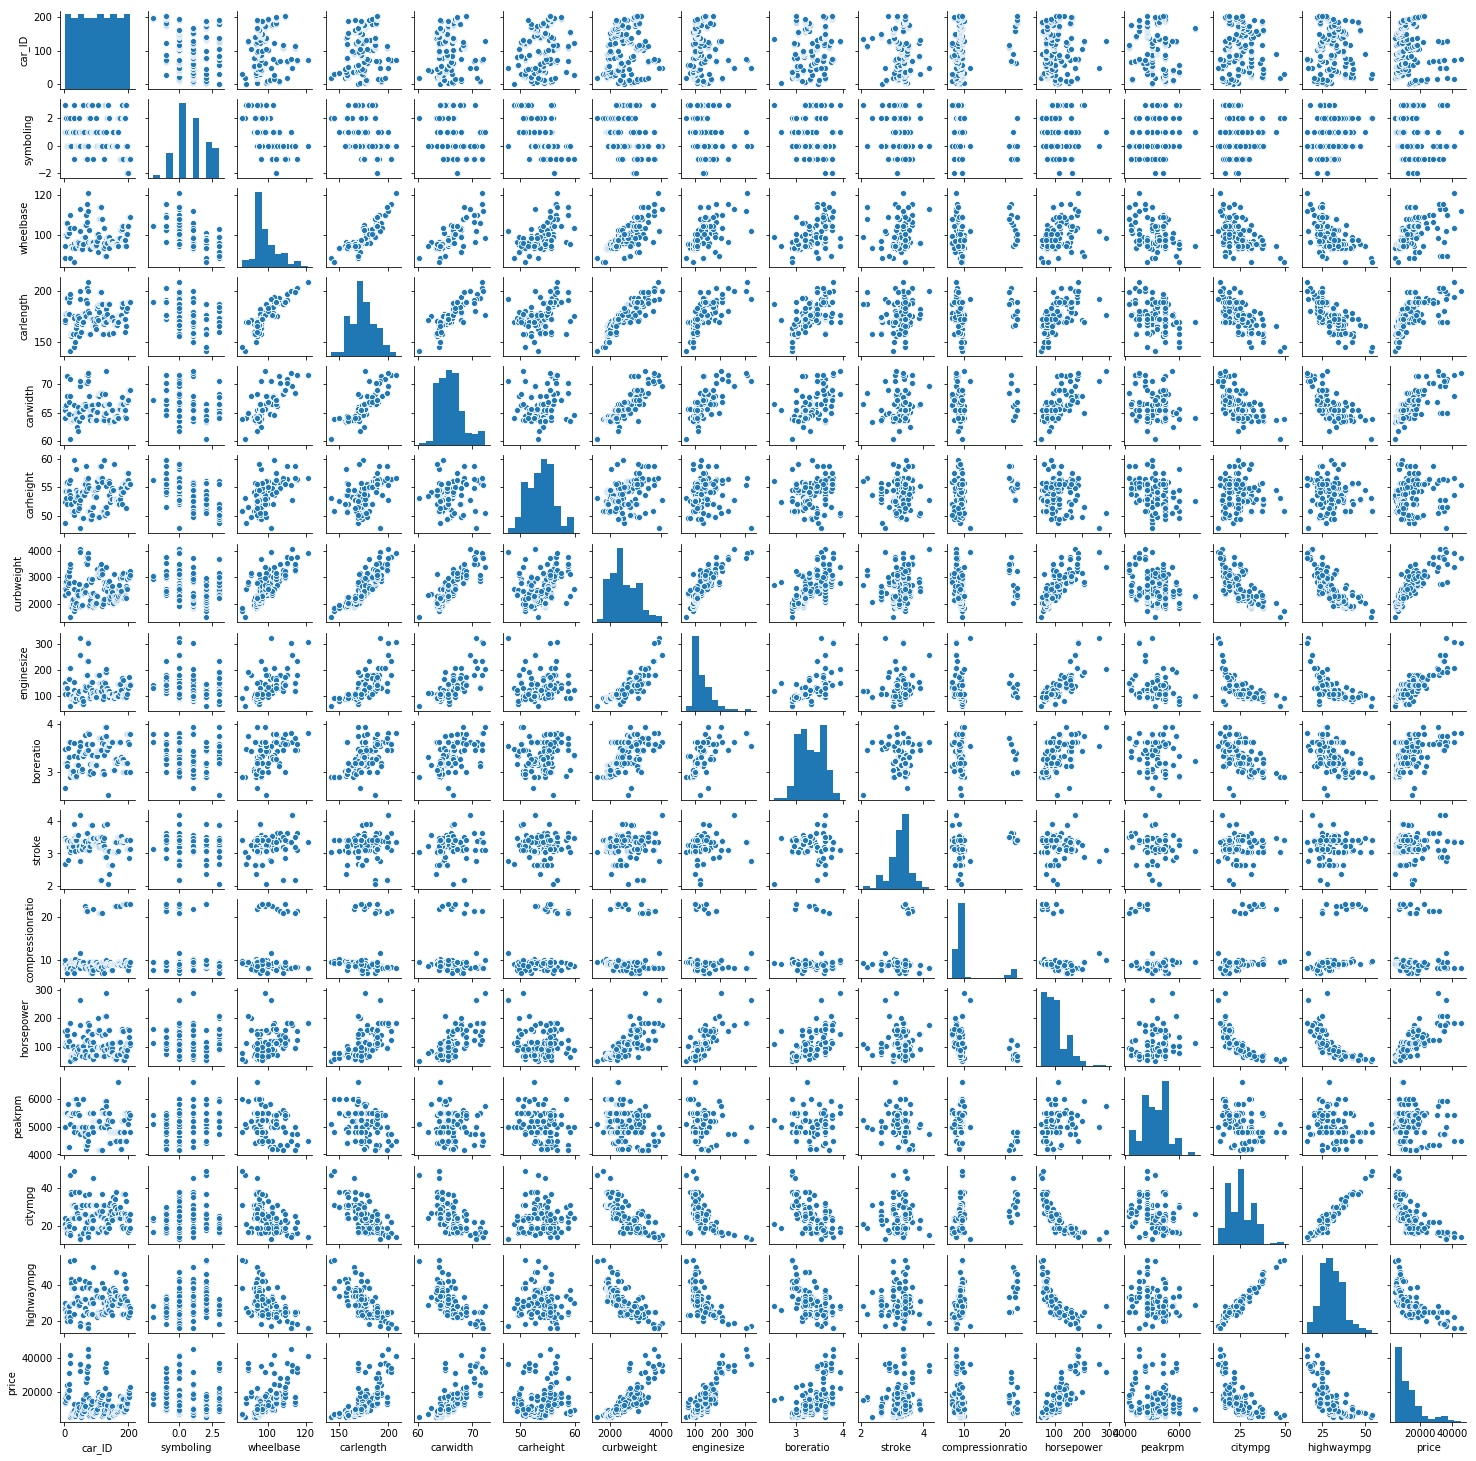

In [1014]:
pair=sns.pairplot(car_pricing)
pair.fig.set_size_inches(20,20)
plt.show()

INFERENCES:

1. carwidth, carlength,curbweight, enginesize and horse power have a high positive correlation with price.
2. Symboling, carheight, stroke, compression ratio and peakrpm do not have any significant correlation with price.
3. We can see that some variables are highly correlated with other variables which will lead to multicollinearity which can be dealt using VIF later on.
4. highwaympg and citympg have a high negative correlation with price.


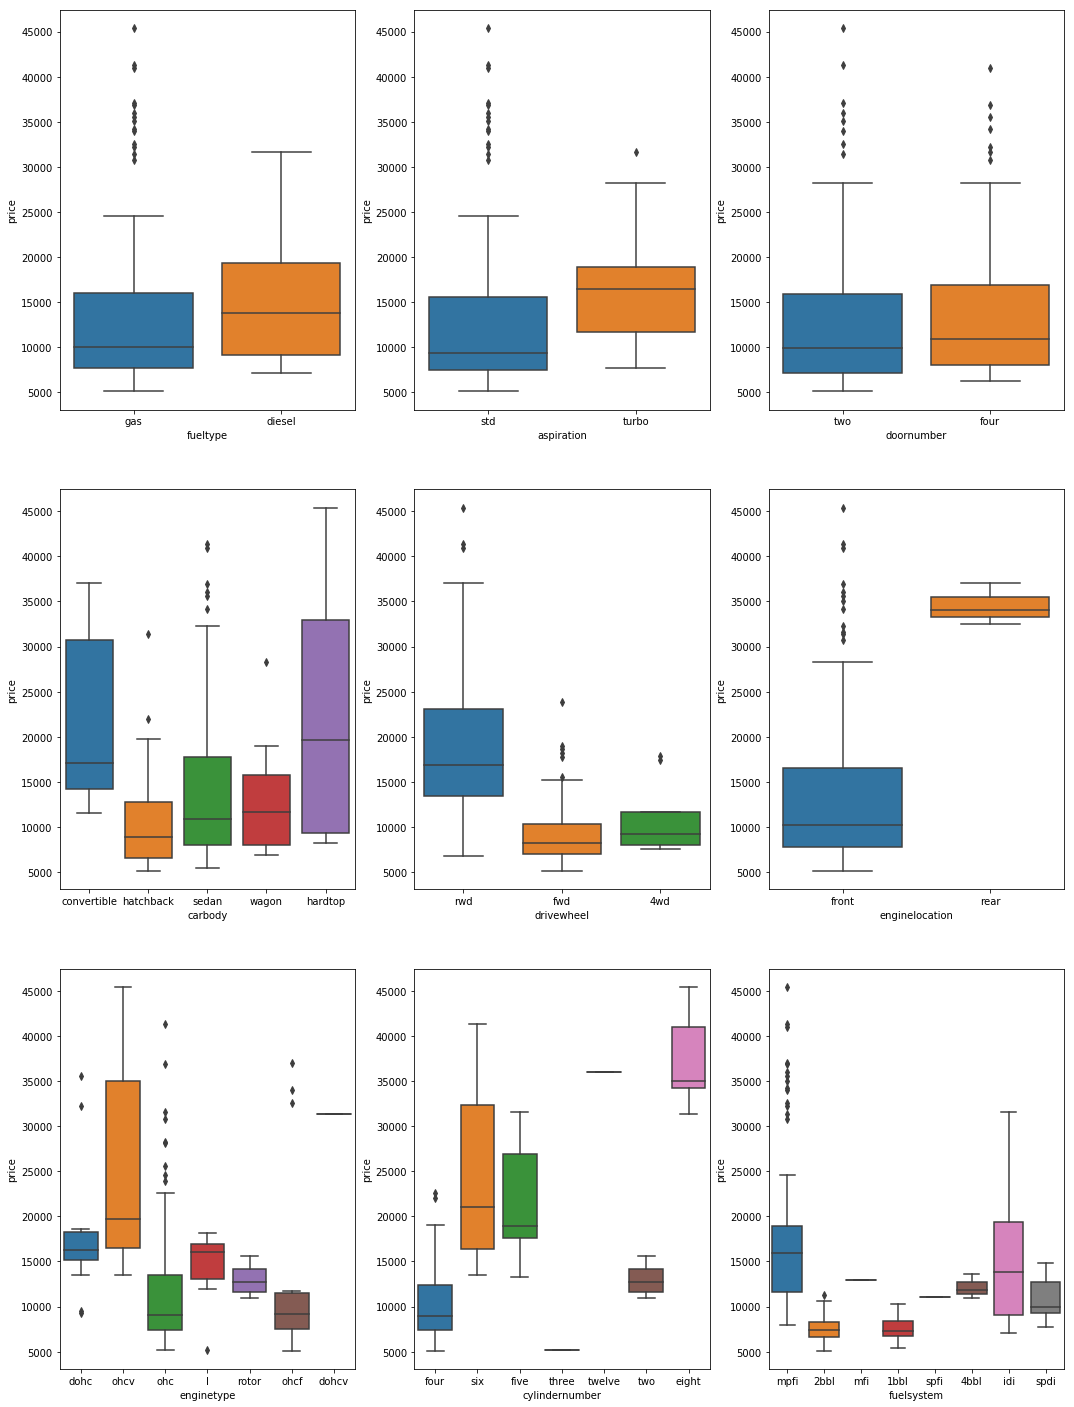

In [1015]:
# Relation of categorical variable with car price

plt.figure(figsize=(18, 25))

#fueltype
plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y = 'price', data = car_pricing)


#aspiration
plt.subplot(3,3,2)
sns.boxplot(x='aspiration', y = 'price', data = car_pricing)

#doornumber
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_pricing)

#carbody
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_pricing)

#drivewheel
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_pricing)

#enginelocation
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_pricing)

#enginetype
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_pricing)

#cylindernumber
plt.subplot(3,3,8)
ax1=sns.boxplot(x = 'cylindernumber', y = 'price', data = car_pricing)
      
#fuelsystem
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_pricing)

plt.show()

INFERENCES: 
1. From the boxplot above, we can infer that the price of diesel cars is considerably higher than cars which use petrol as fuel.
2. Turbo type aspiration also has a higher price than std type aspiration.
3. The number of doors in a car doesn't have any significant effect on the price of cars.
4. The median price of cars having hardtop is much higher than hatchbacks, sedan and wagons. 
5. Rear wheel drive also have a significantly higher price than forward wheel drive or four wheeel drive.
6. In terms of engine location, rear placement of engine causes a steep rise in price.

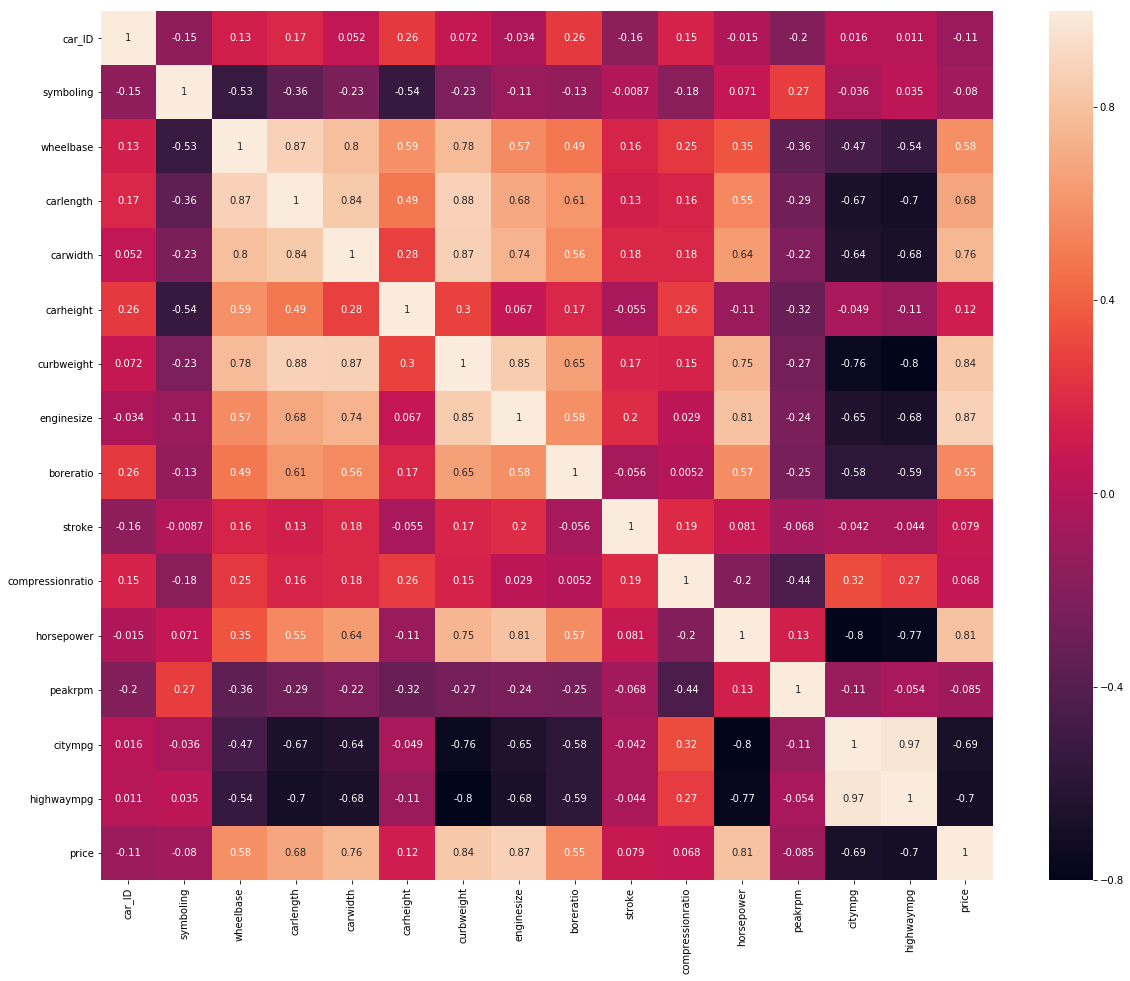

In [1016]:
# checking correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(20, 16))
sns.heatmap(car_pricing.corr(),annot=True)
plt.show()

The heat map confirms our inferences obtained from the pariplot.

## Step 3: Data Preparation

In [1017]:
#The symboling column should be a categorical data type rather than an int data type. Therefore, we will convert it.
car_pricing['symboling']= car_pricing['symboling'].astype('object')

car_pricing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

In [1018]:
#Create a new column to extract car company name
pd.set_option('display.max_columns', 500)
car_pricing['CompanyName'] = car_pricing['CarName'].str.split().str[0]
car_pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [1019]:
#Dropping Car_ID and CarName columns as we have derived the required columns and do not need it for model building anymore.

car_pricing.drop(["car_ID"],axis=1, inplace=True)
car_pricing.drop(["CarName"],axis=1,inplace=True)
car_pricing.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName'],
      dtype='object')

In [1020]:
#Checking unique values for all categorical columns
categorical_cols=["symboling","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","CompanyName"]
for col in categorical_cols:
    print(col,' : ',car_pricing[col].unique())

symboling  :  [3 1 2 0 -1 -2]
fueltype  :  ['gas' 'diesel']
aspiration  :  ['std' 'turbo']
doornumber  :  ['two' 'four']
carbody  :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel  :  ['rwd' 'fwd' '4wd']
enginelocation  :  ['front' 'rear']
enginetype  :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber  :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem  :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
CompanyName  :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


#### On inspection, we can see that the same company is written in several different ways. 

1. case mismatch for 'Nissan', 'nissan' <br>
2. 'alfa-romeo' is misspelled as 'alfa-romero'<br>
3. 'mazda' is misspelled as 'maxda' <br>
4. 'porsche' is misspelled as 'porcshce' <br>
5. 'toyota' is misspelled as 'toyouta' <br>
6. 'vokswagen' and 'vw' instead of 'volkswagen' <br>

In [1021]:
car_pricing['CompanyName'] = car_pricing['CompanyName'].replace(['alfa-romero'], 'alfa-romeo')
car_pricing['CompanyName'] = car_pricing['CompanyName'].replace(['maxda', 'Mazda'], 'mazda')
car_pricing['CompanyName'] = car_pricing['CompanyName'].replace(['Nissan'], 'nissan')
car_pricing['CompanyName'] = car_pricing['CompanyName'].replace(['porcshce'], 'porsche')
car_pricing['CompanyName'] = car_pricing['CompanyName'].replace(['toyouta'], 'toyota')
car_pricing['CompanyName'] = car_pricing['CompanyName'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

car_pricing['CompanyName'].value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
subaru        12
volkswagen    12
peugeot       11
volvo         11
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa-romeo     3
renault        2
mercury        1
Name: CompanyName, dtype: int64

### Creating Dummy Variables

In [1022]:
# For all categorical clumns with only two levels we will change it to 0 and 1
car_pricing['fueltype'] = car_pricing['fueltype'].map({'diesel':0, 'gas':1})
car_pricing['aspiration'] = car_pricing['aspiration'].map({'turbo':0, 'std':1})
car_pricing['doornumber'] = car_pricing['doornumber'].map({'two':0, 'four':1})
car_pricing['enginelocation'] = car_pricing['enginelocation'].map({'rear':0, 'front':1})
car_pricing.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [1023]:
#Creating dummy variables for other categorical columns

categorical_cols2=["symboling","carbody","drivewheel","enginetype","cylindernumber","fuelsystem","CompanyName"]

for col in categorical_cols2:
    
    dummies = pd.get_dummies(car_pricing[col], drop_first = True)
   
    dummies = dummies.add_prefix(f'{col}_')
    
    car_pricing = pd.concat([car_pricing, dummies], axis = 1)

    car_pricing.drop([col], axis = 1, inplace = True)

car_pricing.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


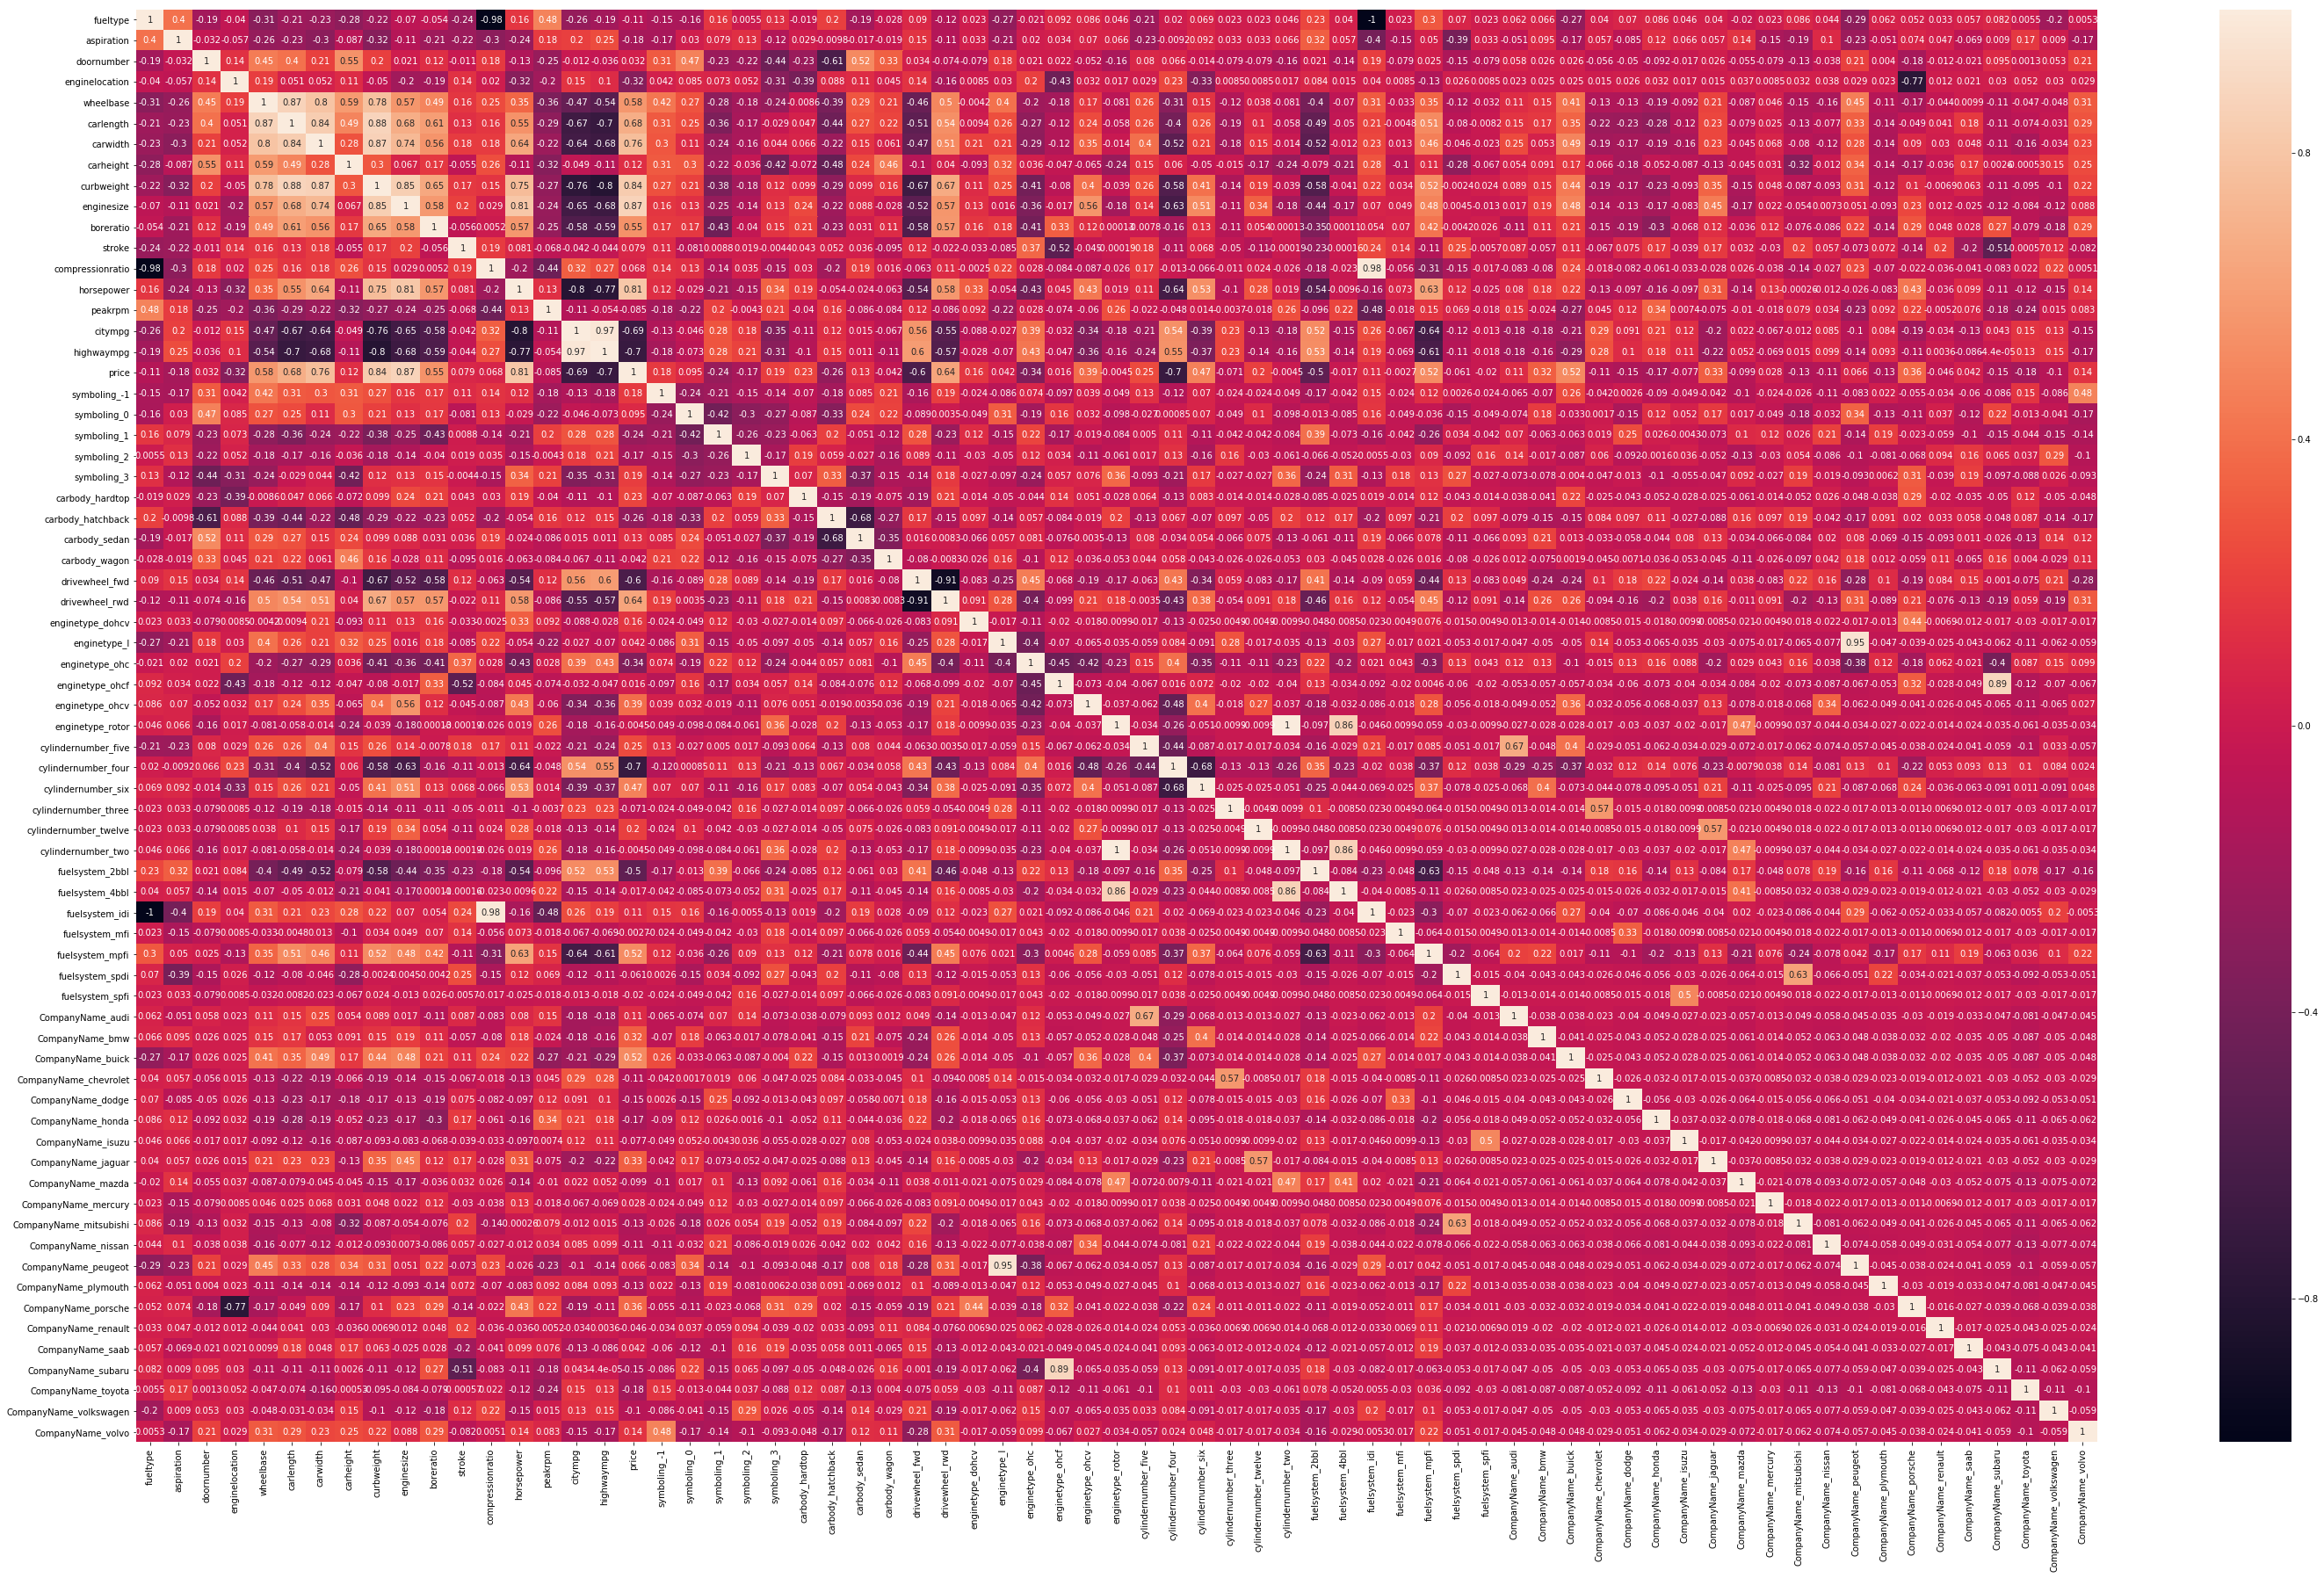

In [1024]:
# Visualising data usign heatmap after creating dummy variables.
plt.figure(figsize=(50,30))
sns.heatmap(car_pricing.corr(),annot=True)
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets

In [1025]:
#importing library from sklearn to split the data into test and train sets
from sklearn.model_selection import train_test_split

#splitting dataframe into train and test sets
np.random.seed(0)
df_train, df_test = train_test_split(car_pricing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [1026]:
#We will rescale the features using Min-Max or Normalisation which will also take care of the outliers in the dataframe.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase' ,'carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1027]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
122,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1028]:
#Checking statistical summary post feature scaling
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.090909,0.349650,0.300699,0.118881,0.125874,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.288490,0.478536,0.460174,0.324786,0.332873,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

We can see that the maximum value in all the columns above is 1 and the minimum value is 0. This shows that Min-Max scaler handles outliers well and we now have a common ground to intrepret the variables in the model.

### Dividing into X and Y sets for the model building

In [1029]:
y_train = df_train.pop('price')
X_train = df_train

### Step 5: Building a linear model

### Using RFE

As there more number of columns, RFE is used to eliminate the Independent variables which are not significant in predicting price of car. We will then manually refine the model.

In [1030]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1031]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             
rfe = rfe.fit(X_train, y_train)

In [1032]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 14),
 ('aspiration', False, 2),
 ('doornumber', False, 41),
 ('enginelocation', True, 1),
 ('wheelbase', False, 3),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('carheight', False, 5),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 15),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 25),
 ('highwaympg', False, 16),
 ('symboling_-1', False, 26),
 ('symboling_0', False, 37),
 ('symboling_1', False, 39),
 ('symboling_2', False, 38),
 ('symboling_3', False, 40),
 ('carbody_hardtop', False, 20),
 ('carbody_hatchback', False, 19),
 ('carbody_sedan', False, 21),
 ('carbody_wagon', False, 22),
 ('drivewheel_fwd', False, 46),
 ('drivewheel_rwd', False, 28),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 45),
 ('enginetype_ohcf', False, 11),
 ('enginetype_ohcv', False, 35),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five

In [1033]:
#Getting a list of top twenty significant variables as suggested by RFE.
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'CompanyName_bmw', 'CompanyName_mitsubishi', 'CompanyName_peugeot',
       'CompanyName_porsche'],
      dtype='object')

In [1034]:
#List of columns which we were deemed insignificant by RFE while considering 20 variables.
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'citympg', 'highwaympg',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CompanyName_audi', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_honda',
       'CompanyName_isuzu', 'CompanyName_jaguar', 'CompanyName_mazda',
       'CompanyName_mercury', 'CompanyName_nissan', 'CompanyName_plymouth',
       'CompanyName_renault', 'CompanyName_saab', 'CompanyName_subaru',
       'CompanyName_toyota', 'CompanyName_volkswagen', 'CompanyName_volvo'],
      d

### Using Manual method to refine the model.

### Model 1

In [1035]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1036]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1037]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [1038]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     118.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.74e-69
Time:                        20:02:39   Log-Likelihood:                 224.63
No. Observations:                 143   AIC:                            -411.3
Df Residuals:                     124   BIC:                            -355.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1039]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,enginetype_l,inf
11,enginetype_rotor,inf
19,CompanyName_peugeot,inf
16,cylindernumber_two,inf
14,cylindernumber_three,inf
0,const,350.89
4,enginesize,28.02
13,cylindernumber_four,15.82
3,curbweight,13.08
7,horsepower,9.69


#### We can see that the p value for "enginetype_dohcv" is very high at 0.901 and hence we will drop the variable.

### Model 2

In [1040]:
X_train_new2 = X_train_rfe.drop(["enginetype_dohcv"], axis = 1)

# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_new2)

lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     126.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.29e-70
Time:                        20:02:40   Log-Likelihood:                 224.62
No. Observations:                 143   AIC:                            -413.2
Df Residuals:                     125   BIC:                            -359.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1041]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,enginetype_rotor,inf
9,enginetype_l,inf
18,CompanyName_peugeot,inf
15,cylindernumber_two,inf
13,cylindernumber_three,inf
0,const,291.71
4,enginesize,27.74
12,cylindernumber_four,15.80
3,curbweight,12.62
7,horsepower,8.49


#### The p value for "peakrpm" is quite high at 0.336 and hence we will drop the variable and rebuild the model.

### Model 3

In [1042]:
X_train_new3 = X_train_new2.drop(["peakrpm"], axis = 1)

# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)

lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.41e-71
Time:                        20:02:40   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1043]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_rotor,inf
8,enginetype_l,inf
17,CompanyName_peugeot,inf
14,cylindernumber_two,inf
12,cylindernumber_three,inf
0,const,272.64
4,enginesize,27.58
11,cylindernumber_four,15.39
3,curbweight,12.19
2,carwidth,6.06


#### All the p values are below 0.05. However, the VIF for many variables are high, hence we will start by eliminating one variable at a time to deal with multicollinearity. We will drop "cylindernumber_three" and rebuild the model. The VIF value for this variable is infinite.

### Model 4

In [1044]:
X_train_new4 = X_train_new3.drop(["cylindernumber_three"], axis = 1)

# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_new4)

lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.41e-71
Time:                        20:02:40   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1045]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_rotor,inf
13,cylindernumber_two,inf
0,const,272.64
4,enginesize,27.58
16,CompanyName_peugeot,17.29
8,enginetype_l,15.86
11,cylindernumber_four,15.39
3,curbweight,12.19
2,carwidth,6.06
7,horsepower,5.90


#### The VIF value for both "enginetype_rotor" and "cylindernumber_two" variables are infinity. We will drop "enginetype_rotor" variable and rebuild the model.

### Model 5

In [1046]:
X_train_new5 = X_train_new4.drop(["enginetype_rotor"], axis = 1)

# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_new5)

lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.41e-71
Time:                        20:02:40   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1047]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,272.64
4,enginesize,27.58
15,CompanyName_peugeot,17.29
8,enginetype_l,15.86
10,cylindernumber_four,15.39
3,curbweight,12.19
2,carwidth,6.06
7,horsepower,5.90
5,boreratio,5.88
12,cylindernumber_two,5.62


#### If we remove the variable "enginesize" the R2 value drops significantly. Hence, we shall first drop the variable "CompanyName_peugeot" which has a very high VIF value of 17.29 and rebuild the model. 

### Model 6

In [1048]:
X_train_new6 = X_train_new5.drop(["CompanyName_peugeot"], axis = 1)

# Adding a constant variable 
X_train_lm6 = sm.add_constant(X_train_new6)

lm6 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     97.92
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.78e-62
Time:                        20:02:41   Log-Likelihood:                 197.91
No. Observations:                 143   AIC:                            -363.8
Df Residuals:                     127   BIC:                            -316.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1049]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,264.01
4,enginesize,24.23
3,curbweight,12.07
10,cylindernumber_four,9.38
2,carwidth,5.80
7,horsepower,5.77
5,boreratio,4.66
12,cylindernumber_two,4.31
11,cylindernumber_twelve,2.89
9,cylindernumber_five,2.85


#### The p value for "enginetype_l" is 0.482 which is significantly higher than 0.05. Hence, we shall drop this variable next even though it has a low VIF value and rebuild the model.

### Model 7

In [1050]:
X_train_new7 = X_train_new6.drop(["enginetype_l"], axis = 1)

# Adding a constant variable 
X_train_lm7 = sm.add_constant(X_train_new7)

lm7 = sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.62e-63
Time:                        20:02:41   Log-Likelihood:                 197.63
No. Observations:                 143   AIC:                            -365.3
Df Residuals:                     128   BIC:                            -320.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1051]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,259.58
4,enginesize,20.10
3,curbweight,9.69
9,cylindernumber_four,8.82
2,carwidth,5.74
7,horsepower,5.37
5,boreratio,4.45
11,cylindernumber_two,3.89
10,cylindernumber_twelve,2.62
8,cylindernumber_five,2.51


#### The variable "horsepower" has a high p value of 0.207. Hence, we will drop this variable and rebuild the model.

### Model 8

In [1052]:
X_train_new8 = X_train_new7.drop(["horsepower"], axis = 1)

# Adding a constant variable 
X_train_lm8= sm.add_constant(X_train_new8)

lm8 = sm.OLS(y_train,X_train_lm8).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm8.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.40e-64
Time:                        20:02:41   Log-Likelihood:                 196.74
No. Observations:                 143   AIC:                            -365.5
Df Residuals:                     129   BIC:                            -324.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [1053]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,258.55
4,enginesize,19.85
3,curbweight,9.38
8,cylindernumber_four,8.01
2,carwidth,5.74
5,boreratio,4.40
10,cylindernumber_two,3.88
9,cylindernumber_twelve,2.53
7,cylindernumber_five,2.42
6,stroke,2.17


#### The variable "CompanyName_mitsubishi" has a p value of 0.091 which is greater than 0.05. We will drop this and rebuild the model.

### Model 9 

In [1054]:
X_train_new9 = X_train_new8.drop(["CompanyName_mitsubishi"], axis = 1)

# Adding a constant variable 
X_train_lm9 = sm.add_constant(X_train_new9)

lm9 = sm.OLS(y_train,X_train_lm9).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.47e-64
Time:                        20:02:41   Log-Likelihood:                 195.15
No. Observations:                 143   AIC:                            -364.3
Df Residuals:                     130   BIC:                            -325.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [1055]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,257.94
4,enginesize,19.80
3,curbweight,9.37
8,cylindernumber_four,7.93
2,carwidth,5.73
5,boreratio,4.40
10,cylindernumber_two,3.88
9,cylindernumber_twelve,2.53
7,cylindernumber_five,2.42
6,stroke,2.12


#### The p values for all variables are less than 0.05. However, the VIF values for enginesize, curbweight, cylindernumber_four and carwdith are still very high (>5). We will drop "curbweight" variable as it is highly correlated with enginesize and carwidth.

### Model 10

In [1056]:
X_train_new10 = X_train_new9.drop(["curbweight"], axis = 1)

# Adding a constant variable 
X_train_lm10 = sm.add_constant(X_train_new10)

lm10 = sm.OLS(y_train,X_train_lm10).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     119.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.02e-62
Time:                        20:02:41   Log-Likelihood:                 188.73
No. Observations:                 143   AIC:                            -353.5
Df Residuals:                     131   BIC:                            -317.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [1057]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,257.93
3,enginesize,16.01
7,cylindernumber_four,7.93
4,boreratio,4.32
2,carwidth,4.20
9,cylindernumber_two,3.78
6,cylindernumber_five,2.42
8,cylindernumber_twelve,2.38
5,stroke,2.10
11,CompanyName_porsche,1.73


#### We will drop "cylindernumber_four" as it is highly correlated with "enginesize" and has a high VIF value of 7.93.

### Model 11

In [1058]:
X_train_new11 = X_train_new10.drop(["cylindernumber_four"], axis = 1)

# Adding a constant variable 
X_train_lm11 = sm.add_constant(X_train_new11)

lm11 = sm.OLS(y_train,X_train_lm11).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.15e-63
Time:                        20:02:42   Log-Likelihood:                 186.59
No. Observations:                 143   AIC:                            -351.2
Df Residuals:                     132   BIC:                            -318.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [1059]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_lm11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,240.65
3,enginesize,5.00
2,carwidth,4.14
4,boreratio,2.23
1,enginelocation,1.70
10,CompanyName_porsche,1.69
7,cylindernumber_twelve,1.63
5,stroke,1.50
6,cylindernumber_five,1.39
8,cylindernumber_two,1.22


#### Although, we have the VIF value of "enginesize" at 5, we can further refine it slightly to bring it below 5. We will drop "CompanyName_porsche" which has a p value of 0.031 and rebuild the model to see if it gives better model.

### Model 12

In [1060]:
X_train_new12 = X_train_new11.drop(["CompanyName_porsche"], axis = 1)

# Adding a constant variable 
X_train_lm12 = sm.add_constant(X_train_new12)

lm12 = sm.OLS(y_train,X_train_lm12).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     138.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.20e-63
Time:                        20:02:42   Log-Likelihood:                 184.05
No. Observations:                 143   AIC:                            -348.1
Df Residuals:                     133   BIC:                            -318.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [1061]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_lm12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,174.82
3,enginesize,4.98
2,carwidth,4.05
4,boreratio,2.19
7,cylindernumber_twelve,1.63
5,stroke,1.50
6,cylindernumber_five,1.37
8,cylindernumber_two,1.22
1,enginelocation,1.16
9,CompanyName_bmw,1.16


### Since all P values are significant and all VIF values are below 5, we will use model 12 for making predictions.

### Step 7: Residual Analysis of the train data

In [1062]:
y_train_pred = lm12.predict(X_train_lm12)

In [1063]:
#Calculating residuals.
res=y_train-y_train_pred

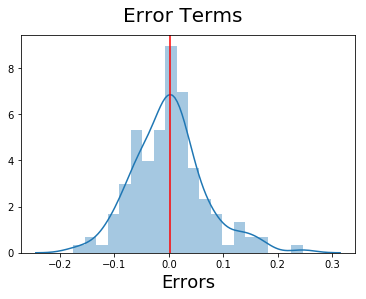

In [1064]:
# Plot the histogram of the error terms
fig = plt.figure()
ax=sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
plt.axvline(x[np.argmax(y)], color='red')

#### Since the error is normally distributed, our assumptions for linear regression are valid, thus proceeding to make predictions using final model - model 12 on test data.

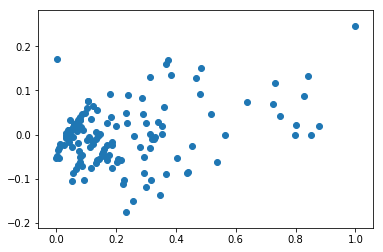

In [1065]:
#Looking for pattern in the residuals
plt.scatter(y_train,res)
plt.show()

We can see that all the residuals are scattered around y=0 and there are no evident patterns in the residuals plot. Thus, we can continue with this model.

### Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. twelfth model.

#### Applying the scaling on the test sets

In [1066]:
num_vars =['wheelbase' ,'carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1067]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.564516,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.145161,0.274194,0.177419,0.241935,0.145161,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.355139,0.449749,0.385142,0.431751,0.355139,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0

#### Dividing into X and Y

In [1068]:
y_test = df_test.pop('price')
X_test = df_test

In [1069]:
# Now let's use our model12 to make predictions.
X_train_new = X_train_new12.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

X_test_new.head()

,const,enginelocation,carwidth,enginesize,boreratio,stroke,cylindernumber_five,cylindernumber_twelve,cylindernumber_two,CompanyName_bmw
160,1.0,1,0.341667,0.139623,0.404762,0.424242,0,0,0,0
186,1.0,1,0.433333,0.181132,0.404762,0.611111,0,0,0,0
59,1.0,1,0.516667,0.230189,0.563492,0.606061,0,0,0,0
165,1.0,1,0.308333,0.139623,0.444444,0.449495,0,0,0,0
140,1.0,1,0.291667,0.177358,0.746032,0.227273,0,0,0,0


In [1070]:
# Making predictions using model 12
y_pred = lm12.predict(X_test_new)

### Step 9: Model Evaluation

Text(0, 0.5, 'Car Price')

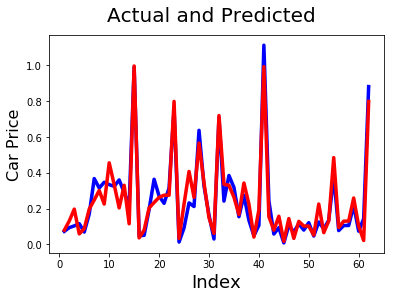

In [1071]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")     #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)                  
plt.xlabel('Index', fontsize=18)
plt.ylabel('Car Price', fontsize=16)

We can see that our actual and the predicted values overlap quite well.

Text(0, 0.5, 'Car Price')

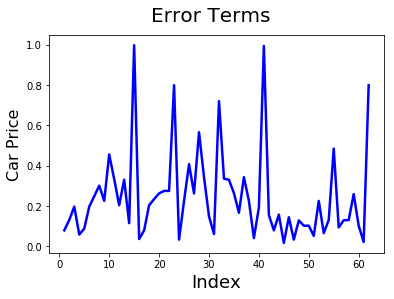

In [1072]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)                # Y-label

Text(0, 0.5, 'y_pred')

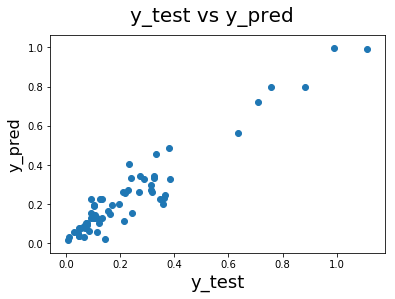

In [1073]:
#Let's now plot the graph for actual versus predicted values.
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [1074]:
#To calculate the R-squared value for test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9125349011476402

In [1075]:
#R squared value for train dataset
r2_score(y_train,y_train_pred)

0.9033928986999924

In [1076]:
# Now let's check the Root Mean Square Error of our model.
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.06837291238444773


### INFERENCES:

1. The R-square value is : 0.903 (90.3%)  and the Adjusted R-Square is : 0.897 (89.7%). Since, the R square value and the Adjusted R-square value are very close by, we can conclude that we have not added any redundant variable in our model.

2. The R-square value for the test dataset is 0.913 (91.3%). Hence, we can conclude that the model performs well on the test dataset.

3. We can see that the equation of our best fitted line is:

$ price = 0.2975 - (0.3961 \times enginelocation) + (0.4149 \times carwidth) + (0.9227 \times enginesize) - ( 0.0918 \times boreratio) - (0.01316 \times stroke) + (0.0557 \times cylindernumber\_five) - (0.2265 \times cylindernumber\_twelve) + (0.2083 \times cylindernumber\_two) + (0.2230 \times CompanyName\_bmw) $

Backward elimination method has been used, starting with RFE and then manually removing columns. Model 12 is choosen with Adj. R squared of 0.897 and is used for predicting Price of car. Model is evaluated by plotting graph of y_test and y_pred and also error terms are plotted. Spread of y_test and y_pred is plotted as scatter plot. Error terms distribution is plotted and it follows Gaussian Distribution. Root Mean Square Error for this model is 0.068.

4. Thus, we can see that the price is dependent on the following factors significantly:<br>
  Engine location - If the value increases by 1 unit, price decreases by 0.3961 units. <br>
  Carwidth -  If the value increases by 1 unit, price increases by 0.4149 units.<br>
  enginesize - If the value increases by 1 unit, price increases by 0.9227 units.<br>
  boreratio - If the value increases by 1 unit, price decreases by 0.0918 units.<br>
  stroke - If the value increases by 1 unit, price decreases by 0.01316 units.<br>
  cylindernumber_five  - If the value increases by 1 unit, price increases by 0.0557 units.<br>
  cylindernumber_twelve - If the value increases by 1 unit, price decreases by 0.2265 units.<br>
  cylindernumber_two - If the value increases by 1 unit, price increases by 0.2083 units.<br>
  CompanyName_bmw - If the value increases by 1 unit, price increases by 0.2230 units.<br>
